In [1]:
from PIL import Image
import numpy as np
import os, glob, sys
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import load_model

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_dir = '/content/drive/MyDrive/Colab Notebooks/시각지능/day16/raw-img'
categories = ['cow','cat','dog','chicken']
np_classes = len(categories)

image_w = 100
image_h = 100

pixel = image_h * image_w * 3

X=[]
y=[]

for idx, messy_desk in enumerate(categories) : ## 인덱스 값과 벨류 값이 같이나옴 enumerate
  img_dir_detail = img_dir + "/" + messy_desk
  files = glob.glob(img_dir_detail + "/*") ## 파일들이 리스트 형태로 저장된다.

  for i, f in enumerate(files) :
    try :
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_w, image_h))
      data = np.asarray(img)
      # Y는 0 아니면 1 이므로 idx 값으로 넣는다.
      X.append(data)
      y.append(idx)
      if i % 300 == 0 :
        print(messy_desk, ":", f)
      
    except :
      print(messy_desk, str(i) + " 번째에서 에러", f)

X = np.array(X)
y = np.array(y)

## train set 0.9, test set 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## 전처리 된 파일을 저장한다 : check point 1
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/Colab Notebooks/시각지능/day18/binary_Image_data.npy", xy)
 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255




print(len(X))

print(y)

In [3]:
X_train, X_test, y_train, y_test = np.load("/content/drive/MyDrive/git/4_categorical_100.npy",allow_pickle=True)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(len(X_train))
print(y_test)

9095
[1 0 1 ... 1 2 0]


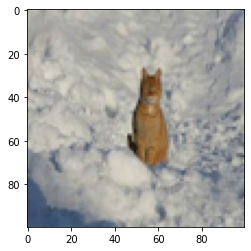

1


In [ ]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 


pp.imshow(X_train[0]) 
pp.show()

print(y_train[0])



In [7]:
batch_size = 50
input_shape = (100,100,3)


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import applications
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
def final_model(MODEL):
  x = MODEL.output
  x = Flatten()(x)
  x = Dense(1024, activation = "relu")(x)
  x = BatchNormalization()(x) 
  x = Dense(128, activation = "relu")(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  predictions = Dense(4, activation = "softmax")(x)

  model_final = tf.keras.models.Model(inputs = MODEL.input, outputs = predictions)

  return model_final



In [10]:
model = tf.keras.applications.ResNet50V2(weights = 'imagenet', include_top=False, input_shape = input_shape)

for layer in model.layers[:5] :
  layer.trainable = False

model_final = final_model(model)


opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model_final.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model_final.fit(X_train, y_train, callbacks=[early_stopping], batch_size=50, validation_data = (X_test,y_test), epochs = 100)

94683136/94668760 [==============================] - 0s 0us/step
Epoch 1/100
182/182 [==============================] - 44s 148ms/step - loss: 1.2154 - accuracy: 0.5100 - val_loss: 0.6303 - val_accuracy: 0.7567
Epoch 2/100
182/182 [==============================] - 24s 132ms/step - loss: 0.6660 - accuracy: 0.7377 - val_loss: 0.5190 - val_accuracy: 0.7953
Epoch 3/100
182/182 [==============================] - 24s 134ms/step - loss: 0.4846 - accuracy: 0.8190 - val_loss: 0.4694 - val_accuracy: 0.8269
Epoch 4/100
182/182 [==============================] - 25s 135ms/step - loss: 0.3862 - accuracy: 0.8582 - val_loss: 0.4324 - val_accuracy: 0.8398
Epoch 5/100
182/182 [==============================] - 25s 136ms/step - loss: 0.3160 - accuracy: 0.8924 - val_loss: 0.4196 - val_accuracy: 0.8506
Epoch 6/100
182/182 [==============================] - 25s 136ms/step - loss: 0.2655 - accuracy: 0.9132 - val_loss: 0.4000 - val_accuracy: 0.8536
Epoch 7/100
182/182 [==============================] - 25s 

KeyboardInterrupt: ignored

In [ ]:
model_xce = tf.keras.applications.Xception(weights = 'imagenet', include_top=False, input_shape =input_shape)

for layer in model_xce.layers[:5] :
  layer.trainable = False

model_final_xce = final_model(model_xce)

opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model_final_xce.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_xce = model_final_xce.fit(X_train, y_train, callbacks=[early_stopping], batch_size=50, validation_data = (X_test,y_test), epochs = 100)

In [ ]:
model_res = tf.keras.applications.ResNet101(weights = 'imagenet', include_top=False, input_shape =input_shape)

for layer in model_res.layers[:5] :
  layer.trainable = False


model_final_res = final_model(model_res)


opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model_final_res.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_res = model_final_res.fit(X_train, y_train, callbacks=[early_stopping], batch_size=50, validation_data = (X_test,y_test), epochs = 100)

171450368/171446536 [==============================] - 1s 0us/step


In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


val_acc_inc=history.history['val_loss']
val_acc_xce=history_xce.history['val_loss']
val_acc_res=history_res.history['val_loss']

epochs_inc=range(len(val_acc_inc))
epochs_xce=range(len(val_acc_xce))
epochs_res= range(len(val_acc_res))


plt.plot(epochs_inc, val_acc_inc, 'r', "val_acc_inc")
plt.plot(epochs_xce, val_acc_xce, 'b', "val_acc_xce")
plt.plot(epochs_res, val_acc_res, 'g', "val_acc_res")
plt.legend(['val_acc_inc','val_acc_res','val_acc_xce'], loc = 'upper left')

plt.title('val_acc : Inception, Resnet, Xception')
plt.figure()
plt.show()


NameError: ignored